# Model Comparison

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

In [104]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [113]:
#setting up the data

data = pd.DataFrame()
data['GRE_score'] = df['GRE Score']
data['TOEFL_score'] = df['TOEFL Score']

#removed these data (below) because the p-values were too high - the data was not contributing to the model
# data['University_rating'] = df['University Rating']
# data['SOP'] = df['SOP']

data['LOR'] = df['LOR ']
data['CGPA'] = df['CGPA']
data['Research'] = df['Research']
data['Chance_of_admit'] = df['Chance of Admit ']
data.head()

,GRE_score,TOEFL_score,LOR,CGPA,Research,Chance_of_admit
0,337,118,4.5,9.65,1,0.92
1,324,107,4.5,8.87,1,0.76
2,316,104,3.5,8.00,1,0.72
3,322,110,2.5,8.67,1,0.80
4,314,103,3.0,8.21,0,0.65


# Linear Regression Model

paramaters:
Intercept     -1.298464
GRE_score      0.001782
TOEFL_score    0.003032
LOR            0.022776
CGPA           0.121004
Research       0.024577
dtype: float64 

p-values:
Intercept      5.514493e-25
GRE_score      2.943359e-03
TOEFL_score    4.650492e-03
LOR            2.974202e-06
CGPA           3.132981e-22
Research       2.053607e-03
dtype: float64 

R^2:
0.8027222805038366 

convidence intervals:
                    0         1      wide
Intercept   -1.529057 -1.067870  0.461187
GRE_score    0.000611  0.002953  0.002342
TOEFL_score  0.000938  0.005126  0.004188
LOR          0.013332  0.032221  0.018889
CGPA         0.097933  0.144075  0.046142
Research     0.009006  0.040148  0.031143


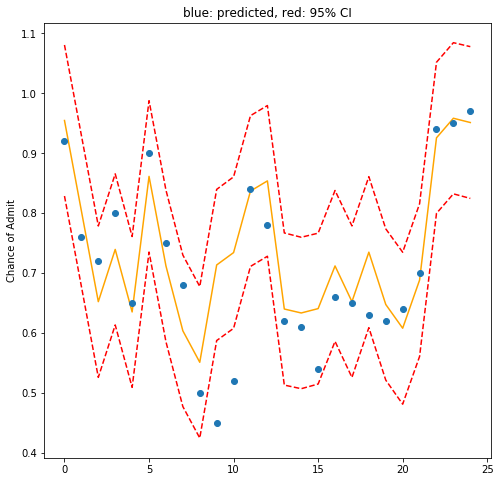

                            OLS Regression Results                            
Dep. Variable:        Chance_of_admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Fri, 08 Feb 2019   Prob (F-statistic):          2.04e-136
Time:                        12:48:55   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2985      0.117    -11.070      

In [310]:
linear_formula = 'Chance_of_admit ~ GRE_score+TOEFL_score+LOR+CGPA+Research'

#fit the model to the data
lm = smf.ols(formula=linear_formula, data=data).fit()
print('paramaters:')
print(lm.params, '\n')
print('p-values:')
print(lm.pvalues, '\n')
print('R^2:')
print(lm.rsquared, '\n')

#confidence intervals
conf_int = lm.conf_int()
conf_int['wide'] = abs(conf_int[1] - conf_int[0])
print('convidence intervals:')
print(conf_int)
      
# Use wls_prediction_std to build confidence intervals

prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure(figsize=(8,8))
plt.plot(iv_u[0:25], '--', color='r')
plt.plot(iv_l[0:25], '--', color='r')
plt.plot(lm.fittedvalues[0:25], color='orange')
plt.plot(data['Chance_of_admit'][0:25], 'o')
plt.title('blue: predicted, red: 95% CI')
plt.ylabel('Chance of Admit')
plt.show()

print(lm.summary())

In [125]:
regr = linear_model.LinearRegression()
Y = data['Chance_of_admit']
X = data[['GRE_score','TOEFL_score','LOR','CGPA','Research']]
lr = regr.fit(X, Y)

cross_validation = cross_val_score(lr, X, Y, cv=5)
print(cross_validation)
print('mean: {}%'.format(np.mean(cross_validation)*100))
print('standard deviation: {}%'.format(np.std(cross_validation)*100))

[0.66361767 0.80086292 0.78062135 0.83887964 0.81555304]
mean: 77.99069235272839%
standard deviation: 6.117398564674394%


# K Nearest Neighbors Regression Model

In [294]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=17)
print(knn.fit(X, Y).score(X, Y))


cross_val = cross_val_score(knn, X, Y, cv=5)
print('mean: {}%'.format(np.mean(cross_val)*100))
print('standard deviation: {}%'.format(np.std(cross_val)*100))

0.7455212215955297
mean: 66.79820767951917%
standard deviation: 10.018285354760934%


In [295]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=17, weights='distance')
print(knn_w.fit(X, Y).score(X, Y))

cross_val_w = cross_val_score(knn_w, X, Y, cv=5)
print('mean: {}%'.format(np.mean(cross_val_w)*100))
print('standard deviation: {}%'.format(np.std(cross_val_w)*100))

1.0
mean: 66.67940577887099%
standard deviation: 10.005935705919365%


In [298]:
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std()*2))
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (cross_val_w.mean(), cross_val_w.std()*2))

Unweighted Accuracy: 0.67 (+/- 0.20)
Weighted Accuracy: 0.67 (+/- 0.20)


We can see that in the KNN model, there is little to no difference between weighted with distance or not. 

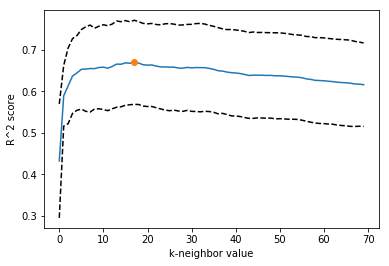

5 fold cross validation R^2 value of 67.02% +/- 20.32
k value of 17


In [308]:
best_k_val = []
best_k_val_std = []
for i in range(70):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i+1)
    cross_val = cross_val_score(knn, X, Y, cv=5)
    mean = np.mean(cross_val)
    std = cross_val.std()
    best_k_val.append(mean)
    best_k_val_std.append(std)

values = np.array(best_k_val)
values_std = np.array(best_k_val_std)
plt.plot(values)
plt.plot(np.where(values == values.max())[0], values.max(), 'o')
plt.plot(values + values_std, '--', c='k')
plt.plot(values - values_std, '--', c='k')
plt.xlabel('k-neighbor value')
plt.ylabel('R^2 score')
plt.show()

k_val = np.where(values==values.max())[0][0]

print('5 fold cross validation R^2 value of {:.2f}% +/- {:.2f}'.format(values.max()*100, values_std[k_val]*2*100))
print('k value of',np.where(values==values.max())[0][0])

We can see that the linear regression model does much better than the knn model.

The Linear Regression model has an accuracy of $78 \pm 12\%$ 

Whereas the KNN model has an accuracy of $67 \pm 20\%$